In [4]:
from datascience import *
import numpy as np
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
%matplotlib inline

A mediados del siglo XIX, Gregor Mendel realizó una serie de experimentos con plantas de guisante para entender los principios que rigen la herencia biológica. A través de la observación sistemática de caracteres como el color de las flores, formuló las leyes fundamentales de la genética. Uno de sus enfoques fue el estudio de cómo se transmite el color de las flores entre generaciones, lo que lo llevó a postular la existencia de "factores hereditarios" —hoy conocidos como genes— que se segregan de manera independiente durante la formación de gametos.


## Suposición teórica:

Mendel postuló que cada característica está determinada por un par de “factores” (hoy conocidos como alelos), y que estos se segregan de forma independiente durante la formación de gametos. En el caso del color de las flores, propuso que un solo gen con dos variantes alélicas era responsable del rasgo: un alelo dominante que produce flores moradas y un alelo recesivo que da lugar a flores blancas.

Para comprobar su hipótesis, Mendel cruzó plantas de líneas puras: unas que siempre producían flores moradas y otras que siempre producían flores blancas. Las plantas resultantes de la primera generación (F1) mostraron únicamente flores moradas, lo que indicó que el alelo morado era dominante. Luego, cruzó entre sí las plantas F1 para obtener la segunda generación F2.

Basado en las leyes de la herencia, predijo que en la segunda generación (F2), la proporción fenotípica esperada sería de $3:1$, es decir, un $75\%$ de flores moradas y un $25\%$ de flores blancas.

Experimento:

- Se obtuvieron 929 flores a partir del cruce de plantas de líneas puras.

- Resultado:

    - 705 flores moradas
    - 224 flores blancas


En sintesis: Mendel cruzó platans de lineas puras:

- Una planta con flores moradas de genotipo AA (homocigota dominante)
- Con una planta con flores blancas de genotipo aa (homocigota recesiva)

Esto dio lugar a la primera generación (F1):

- Todas las plantas F1 fueron Aa (heterocigotas), como el alelo A es dominante, todas las flores F1 fueron moradas

Después, Mendel cruzó entre sí dos plantas F1 (Aa × Aa):

- Cruce que produce la proporción 3:1.


In [5]:
(705/929)*100, (224/929)*100

(75.8880516684607, 24.11194833153929)

Buscamos determinar si las diferencias entre los valores observados y las proporciones esperadas (75% flores moradas y 25% flores blancas) pueden atribuirse al azar, o si sugieren una desviación significativa respecto al modelo propuesto por Mendel.

**Hipótesis nula (H₀):**

El modelo de Mendel es correcto. Cada planta tiene una probabilidad del 75% de producir flores moradas y del 25% de producir flores blancas.

**Hipótesis alternativa (H₁):**
El modelo de Mendel no es correcto. Las proporciones observadas de flores moradas y blancas difieren significativamente de las predicciones teóricas (75% y 25%, respectivamente).

# Estadística de prueba:

Queremos ver si estas dos distribuciones están cerca una de la otra o muy separadas. Así que una estadística de prueba puede ser *la distancia de variación total (TVD)* 

In [6]:
# TVD: Distancia de variacion total 
# Valor observado - Valor esperado
75.888-75

0.8880000000000052

In [7]:
#Estadistica observada

observed_statistic = abs ( 100 * (705 / 929) - 75)
observed_statistic

0.8880516684607045

In [8]:
100 * (705 / 929)

75.8880516684607

## Distribuciones de la estadística de prueba

In [9]:
mendel_proportions = make_array(0.75, 0.25)
mendel_proportion_purple = mendel_proportions.item(0)
sample_size = 929

In [10]:
mendel_proportions

array([ 0.75,  0.25])

In [11]:
sample_proportions(929, mendel_proportions)

array([ 0.70613563,  0.29386437])

In [12]:
def distribution():
    sample_proportion_purple = sample_proportions(929, mendel_proportions).item(0)
    return 100 * abs(sample_proportion_purple)

In [13]:
repetitions = 10000
distances = make_array()
for i in np.arange(repetitions):
    distances = np.append(distances, distribution())

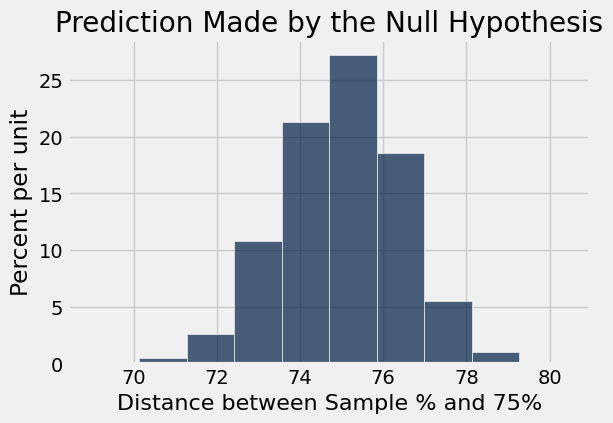

In [14]:
Table().with_column(
    'Distance between Sample % and 75%', distances
).hist()
plots.title('Prediction Made by the Null Hypothesis');

In [312]:
def one_simulated_distance():
    sample_proportion_purple = sample_proportions(929, mendel_proportions).item(0)
    return 100 * abs(sample_proportion_purple - mendel_proportion_purple)
    # Diferencia entre el resultado aleatorio y el modelo
    # Distribucion 

In [313]:
repetitions = 10000
distances = make_array()
for i in np.arange(repetitions):
    distances = np.append(distances, one_simulated_distance())

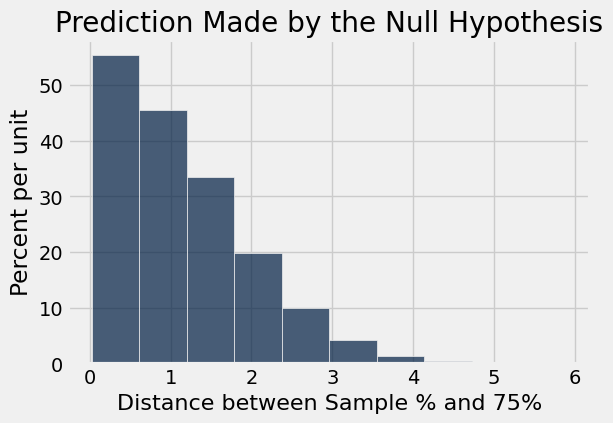

In [314]:
Table().with_column(
    'Distance between Sample % and 75%', distances
).hist()
plots.title('Prediction Made by the Null Hypothesis');

-  75% + 1% el porcentajde  la muestra esta en el rango de 74% y 76%

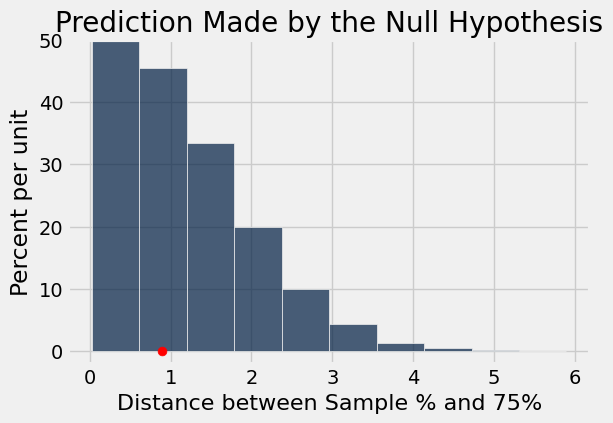

In [315]:
Table().with_column(
    'Distance between Sample % and 75%', distances
).hist()
plots.ylim(-0.02, 0.5)
plots.title('Prediction Made by the Null Hypothesis')
plots.scatter(observed_statistic, 0, color='red', s=40);

Supongamos que otra persona,  cultivó otras 929 plantas de alguna variedad relacionada y quería ver si el modelo de Mendel también funcionaba para plantas de esa variedad. ¿Qué concluirías si su distancia observada fuera de 3.2 como se muestra a continuación?

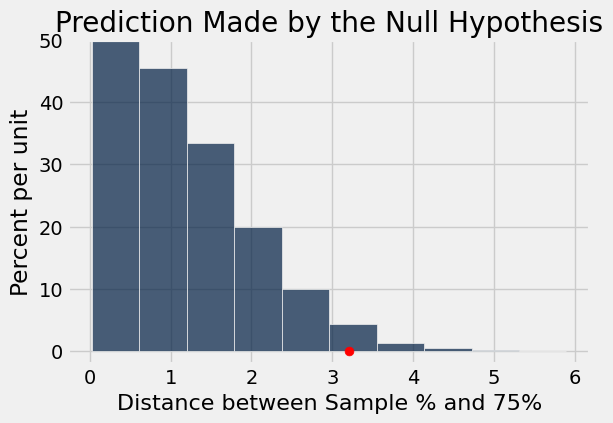

In [316]:
different_observed_statistic = 3.2
Table().with_column(
    'Distance between Sample % and 75%', distances
).hist()
plots.ylim(-0.02, 0.5)
plots.title('Prediction Made by the Null Hypothesis')
plots.scatter(different_observed_statistic, 0, color='red', s=40);

¿La observación basada en la nueva variedad de plantas es consistente con las predicciones en el histograma, o no?


Ahora la respuesta no es tan clara. Depende de si crees que el punto rojo está demasiado lejos de la mayor parte de los valores predichos para ser consistente con la predicción basada en el modelo de Mendel.

# Límites convencionales y el valor P



In [317]:
distances

array([ 1.15715823,  0.51130248,  0.45748116, ...,  2.87944026,
        2.87944026,  0.1883746 ])

In [318]:
different_observed_statistic = 3.2 
different_observed_statistic

3.2

In [319]:
# Area de la cola. 
np.count_nonzero(distances>=3.2)/repetitions
# 2.5% es el area de la cola. 
#

0.0244

### Nivel de significación o p-value

- Si el valor p es inferior al 5 %, se considera pequeño y el resultado se llama "estadísticamente significativo".

- Si el valor p es aún menor, menos del 1%, el resultado se llama "altamente estadísticamente significativo".

Según esta convención, nuestro valor p del 2,4 % se considera pequeño. Así que la conclusión convencional sería rechazar la hipótesis nula y decir que el modelo de Mendel no se ve bien para las nuevas plantas. 

# Supongamos que queremos probar que una moneda justa


Hn: La moneda es justa

Ha: La moneda no es justa

de 2000 lanzamientos se puede esperar que 1000 sean cara y los otros sellos

In [364]:
moneda = make_array("Tail", "head")

In [365]:
distance = make_array()
repetitions=100000
for i in range(0, repetitions):
    lanzamiento = np.random.choice( moneda, 2000)
    u = abs(np.count_nonzero(lanzamiento=="head")-1000)
    distance=np.append(distance,u )

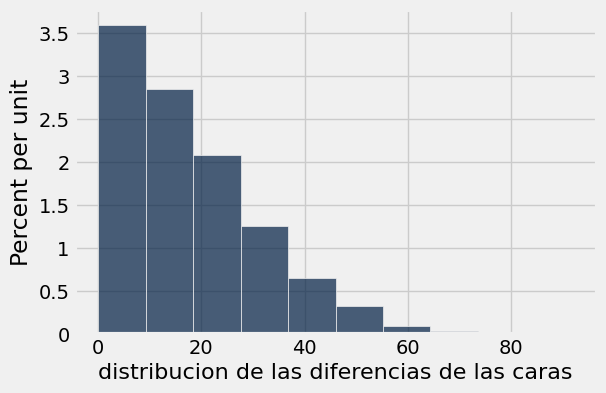

In [368]:
Table().with_column(
    'distribucion de las diferencias de las caras', distance
).hist()
plots.title('');


In [369]:
(np.count_nonzero(distance>=45)/repetitions)*100
# Favorecemos la hipotesis alternativa

4.626

Hay un 5% de posiblidades de que la prueba concluya de manera erroena